## Importing libs

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize import categorical_eda, timeseries_eda
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [2]:
df_raw = pd.read_csv('../data/interim/attr_added/delivery.csv')

E:\Gokul\Anaconda\envs\mldev\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_raw.head()

,id,state,district,case_no,death_cause,death_other,delivery_comp1,delivery_comp2,delivery_comp3,delivery_comp4,...,delivery_type,discharge_date,registration_no,rural_urban,still_birth,isactive,other_delivery_complication,previous_status,created_on,live_birth
0,1623315,Haryana,Panchkula,1.0,NaN,NaN,N,N,N,N,...,Normal,2018-11-22 00:00:00,1.060029e+11,R,0.0,NaN,NaN,ANC,2019-01-17 11:55:40,1.0
1,1623316,Haryana,Panchkula,1.0,NaN,NaN,N,N,N,N,...,Normal,2018-07-01 00:00:00,1.060029e+11,R,0.0,NaN,NaN,ANC,2019-01-17 12:01:52,1.0
2,1623317,Haryana,Panchkula,1.0,NaN,NaN,N,N,N,N,...,Normal,2018-12-06 00:00:00,1.060029e+11,R,0.0,NaN,NaN,ANC,2019-03-15 12:19:35,1.0
3,1623318,Haryana,Panchkula,1.0,NaN,NaN,N,N,N,N,...,Normal,2018-11-12 00:00:00,1.060029e+11,R,0.0,NaN,NaN,ANC,2019-03-15 12:30:10,1.0
4,1623319,Haryana,Panchkula,1.0,NaN,NaN,N,N,N,N,...,Normal,2018-12-29 00:00:00,1.060029e+11,R,0.0,NaN,NaN,ANC,2019-03-15 14:34:53,1.0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332463 entries, 0 to 332462
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           332463 non-null  object 
 1   state                        332462 non-null  object 
 2   district                     332236 non-null  object 
 3   case_no                      332462 non-null  float64
 4   death_cause                  124 non-null     object 
 5   death_other                  67 non-null      object 
 6   delivery_comp1               258864 non-null  object 
 7   delivery_comp2               258864 non-null  object 
 8   delivery_comp3               258864 non-null  object 
 9   delivery_comp4               258864 non-null  object 
 10  delivery_comp5               0 non-null       float64
 11  delivery_complication        5053 non-null    object 
 12  delivery_conducted_by        332462 non-null  object 
 13 

In [5]:
df = df_raw.iloc[:-1, :].copy()

## EDA

In [6]:
df.shape

(332462, 26)

### id

In [7]:
df['id'].unique()

array([1623315, 1623316, 1623317, ..., '1955774', '1955775', '1955776'],
      dtype=object)

In [8]:
df['id'].nunique()

332462

In [9]:
df['id'].isna().sum()

0

### state

Unique values: ['Haryana']
No. of unique values: 1
Value counts: 
Haryana    100.0
Name: state, dtype: float64


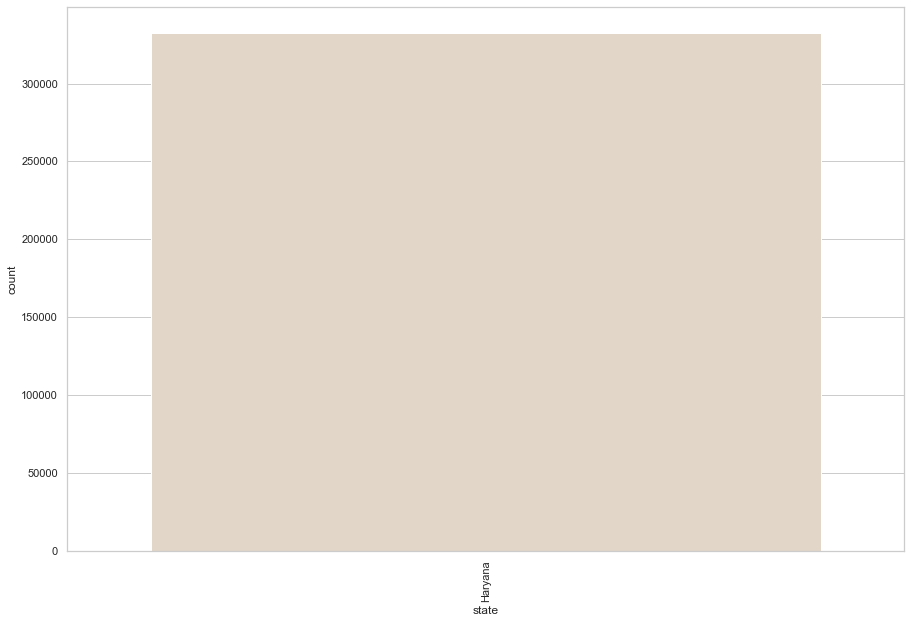

In [14]:
categorical_eda(df, 'state', (15, 10))

### district

Unique values: ['Panchkula' 'Mewat' 'Palwal' 'Yamunanagar' 'Ambala' nan 'Mahendragarh'
 'Karnal' 'Hisar' 'Sirsa' 'Kaithal' 'Jind' 'Gurgaon']
No. of unique values: 12
Missing values count: 226 / 332462
Missing values %: 0.0006797769369130908
Value counts: 
Hisar           15.380633
Karnal          13.963568
Kaithal         11.220036
Mahendragarh    11.127933
Ambala           9.414693
Sirsa            9.409576
Jind             9.168784
Yamunanagar      8.001240
Gurgaon          4.340288
Panchkula        3.276286
Mewat            3.129703
Palwal           1.567259
Name: district, dtype: float64


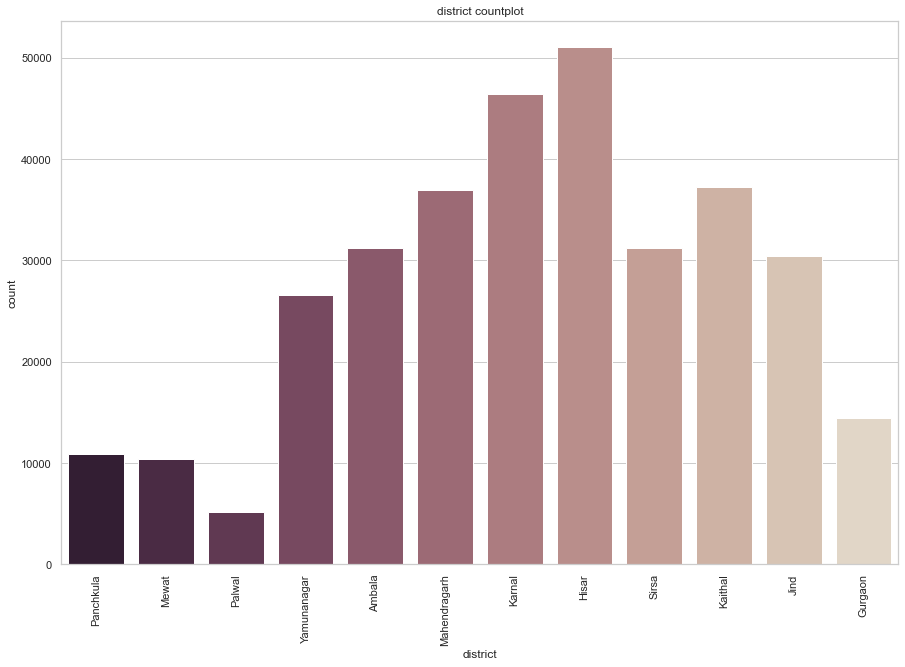

In [20]:
categorical_eda(df, 'district', (15, 10))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332462 entries, 0 to 332461
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           332462 non-null  object 
 1   state                        332462 non-null  object 
 2   district                     332236 non-null  object 
 3   case_no                      332462 non-null  float64
 4   death_cause                  124 non-null     object 
 5   death_other                  67 non-null      object 
 6   delivery_comp1               258864 non-null  object 
 7   delivery_comp2               258864 non-null  object 
 8   delivery_comp3               258864 non-null  object 
 9   delivery_comp4               258864 non-null  object 
 10  delivery_comp5               0 non-null       float64
 11  delivery_complication        5053 non-null    object 
 12  delivery_conducted_by        332462 non-null  object 
 13 

### case_no

In [22]:
df['case_no'].unique()

array([1., 2., 3., 4., 5.])

Unique values: [1. 2. 3. 4. 5.]
No. of unique values: 5
Missing values count: 0 / 332462
Missing values %: 0.0
Value counts: 
1.0    91.473612
2.0     8.144991
3.0     0.366358
4.0     0.014438
5.0     0.000602
Name: case_no, dtype: float64


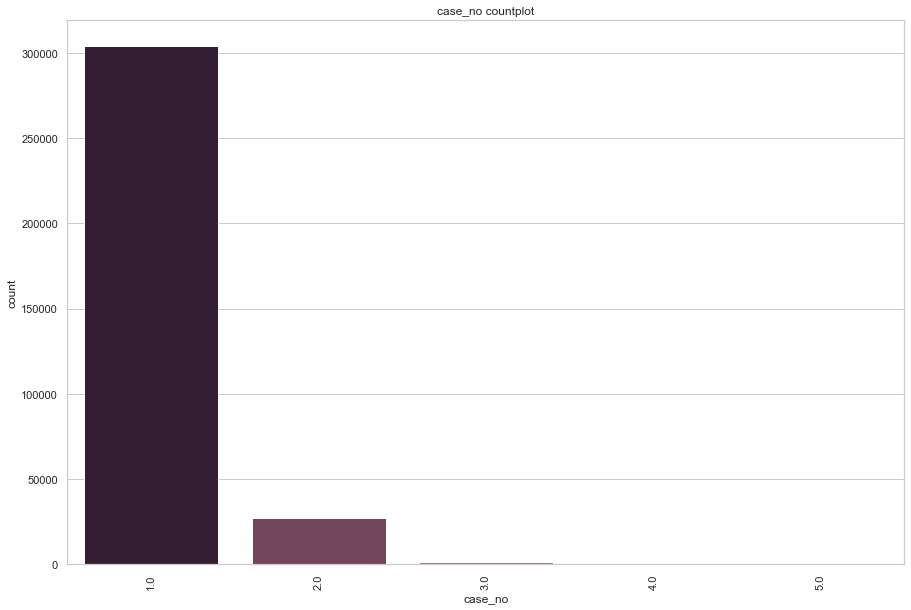

In [24]:
categorical_eda(df, 'case_no', (15, 10))

#### death_cause

Unique values: [nan 'Other' 'High Fever' 'Haemorrahge' 'Eclampcia' 'Obstructed Labour'
 'Prolonged Labour']
No. of unique values: 6
Missing values count: 332338 / 332462
Missing values %: 0.9996270250434636
Value counts: 
Other                66.935484
High Fever           15.322581
Obstructed Labour     7.258065
Haemorrahge           5.645161
Eclampcia             4.032258
Prolonged Labour      0.806452
Name: death_cause, dtype: float64


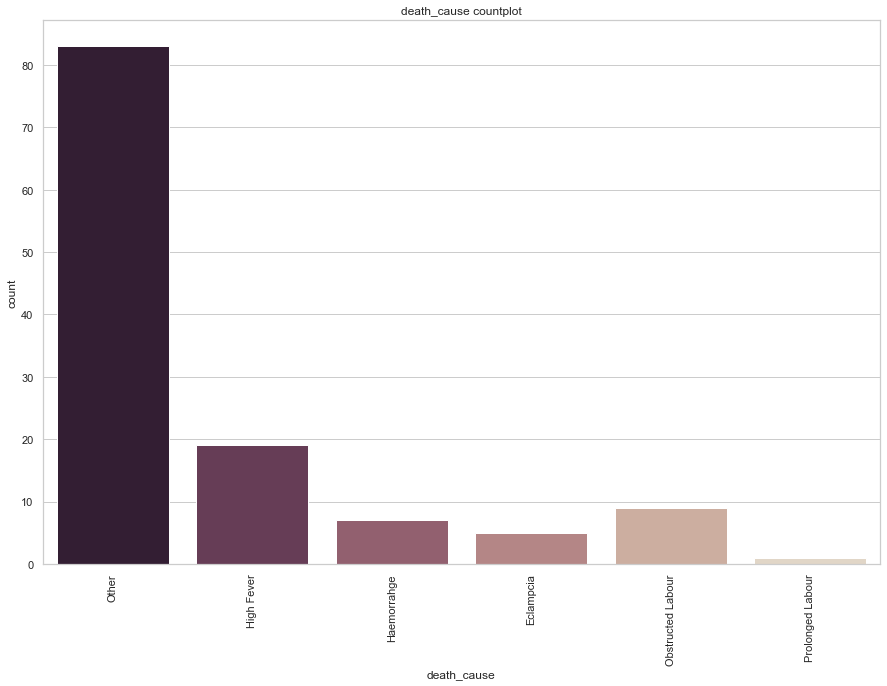

In [26]:
categorical_eda(df, 'death_cause', (15, 10))

### death_other

Unique values: [nan 'ND' 'IDR' 'premature' 'OTHER' 'PPH' 'DEATH'
 'maconiyam pass and no crying' 'HiperTension' 'Heart' 'other' 'others'
 'lowbp' 'Placenta not out' 'stilbirth' 'highbp' 'IUD' 'MUCANIAM' 'iud'
 'still birth' 'Other' 'PREMATURE' 'NO MOVEMENT' 'utres inversen'
 'STILL BIRTH' 'PGI' 'ASPHYXIA' 'FHS NOT FOUND' 'RESPIRATORY PROBLEM'
 'PREMAUTRE' 'INTERA UTRINE CHILD DEATH' 'ABDOMINAL PAIN' 'NOT ALIVE'
 'LIQUOR LESS' 'MECONIUM' ' F S H IS NOT AVILABLE LOVE' 'F HSNOT'
 'JAUNDICE' 'STILL BIRTH ' 'APH' 'FHS ABSENT' 'HEART ATTACK'
 'BABY KI DEATH' 'SANS LENE MEIN PROBLEM' 'BREATHLESSNESS' 'BREATHLESSLY'
 'MISCARRIAGE' 'BLEEDING' 'NO HEART BIT' 'SEVAK SABHASEWAK SABHA'
 'BADKELI' 'ANEMIC' 'HEART DISEASE' 'NOHERT BEET' 'WEIGHT LOSS'
 'BARDEG PROBLEM']
No. of unique values: 55
Missing values count: 332395 / 332462
Missing values %: 0.9997984732089682
Value counts: 
IUD                             7.462687
STILL BIRTH                     5.970149
PPH                             4.4776

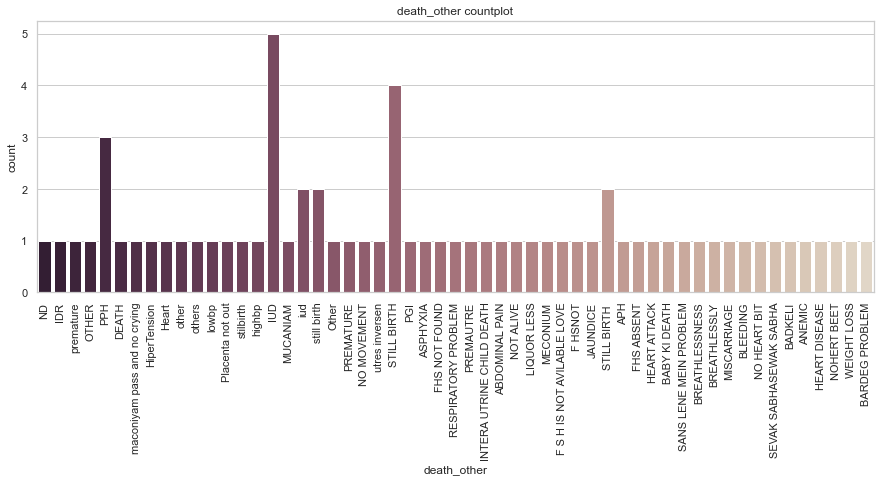

In [31]:
categorical_eda(df, 'death_other', (15, 5))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332462 entries, 0 to 332461
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           332462 non-null  object 
 1   state                        332462 non-null  object 
 2   district                     332236 non-null  object 
 3   case_no                      332462 non-null  float64
 4   death_cause                  124 non-null     object 
 5   death_other                  67 non-null      object 
 6   delivery_comp1               258864 non-null  object 
 7   delivery_comp2               258864 non-null  object 
 8   delivery_comp3               258864 non-null  object 
 9   delivery_comp4               258864 non-null  object 
 10  delivery_comp5               0 non-null       float64
 11  delivery_complication        5053 non-null    object 
 12  delivery_conducted_by        332462 non-null  object 
 13 

### delivery_comp1

Unique values: ['N' ' ' nan]
No. of unique values: 2
Missing values count: 73598 / 332462
Missing values %: 0.221372668154556
Value counts: 
N    74.029606
     25.970394
Name: delivery_comp1, dtype: float64


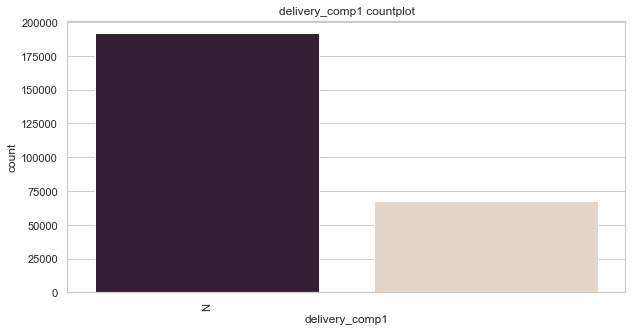

In [36]:
categorical_eda(df, 'delivery_comp1', (10, 5))

### delivery_comp2

Unique values: ['N' ' ' nan]
No. of unique values: 2
Missing values count: 73598 / 332462
Missing values %: 0.221372668154556
Value counts: 
N    74.029606
     25.970394
Name: delivery_comp2, dtype: float64


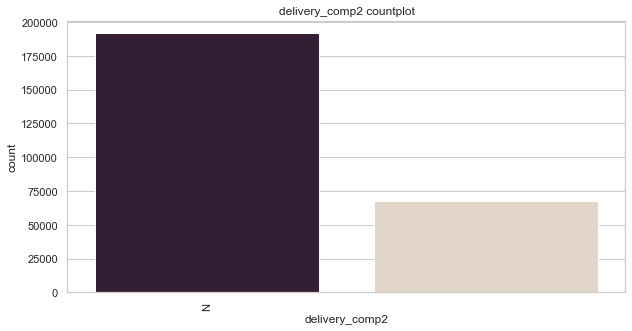

In [38]:
categorical_eda(df, 'delivery_comp2', (10, 5))

In [42]:
df[df['delivery_comp1'] == 'N']['delivery_comp2'].value_counts()

N    191636
Name: delivery_comp2, dtype: int64

In [43]:
df[df['delivery_comp1'] == ' ']['delivery_comp2'].value_counts()

     67228
Name: delivery_comp2, dtype: int64

### delivery_comp3

Unique values: ['N' ' ' nan]
No. of unique values: 2
Missing values count: 73598 / 332462
Missing values %: 0.221372668154556
Value counts: 
N    74.029606
     25.970394
Name: delivery_comp3, dtype: float64


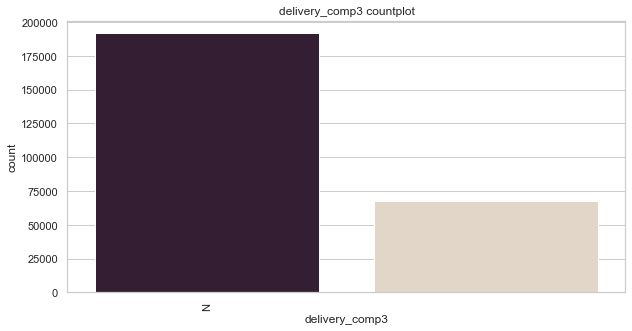

In [39]:
categorical_eda(df, 'delivery_comp3', (10, 5))

In [44]:
df[df['delivery_comp1'] == 'N']['delivery_comp3'].value_counts()

N    191636
Name: delivery_comp3, dtype: int64

In [45]:
df[df['delivery_comp1'] == ' ']['delivery_comp3'].value_counts()

     67228
Name: delivery_comp3, dtype: int64

### delivery_comp4

Unique values: ['N' ' ' nan]
No. of unique values: 2
Missing values count: 73598 / 332462
Missing values %: 0.221372668154556
Value counts: 
N    74.029606
     25.970394
Name: delivery_comp4, dtype: float64


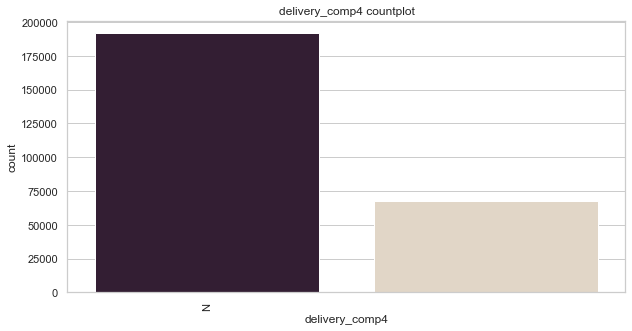

In [46]:
categorical_eda(df, 'delivery_comp4', (10, 5))

In [47]:
df[df['delivery_comp1'] == 'N']['delivery_comp4'].value_counts()

N    191636
Name: delivery_comp4, dtype: int64

In [48]:
df[df['delivery_comp1'] == ' ']['delivery_comp4'].value_counts()

     67228
Name: delivery_comp4, dtype: int64

### delivery_comp5

In [49]:
categorical_eda(df, 'delivery_comp5', (10, 5))

Unique values: [nan]
No. of unique values: 0
Missing values count: 332462 / 332462
Missing values %: 1.0
Value counts: 
Series([], Name: delivery_comp5, dtype: float64)


ValueError: min() arg is an empty sequence

<Figure size 720x360 with 0 Axes>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332462 entries, 0 to 332461
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           332462 non-null  object 
 1   state                        332462 non-null  object 
 2   district                     332236 non-null  object 
 3   case_no                      332462 non-null  float64
 4   death_cause                  124 non-null     object 
 5   death_other                  67 non-null      object 
 6   delivery_comp1               258864 non-null  object 
 7   delivery_comp2               258864 non-null  object 
 8   delivery_comp3               258864 non-null  object 
 9   delivery_comp4               258864 non-null  object 
 10  delivery_comp5               0 non-null       float64
 11  delivery_complication        5053 non-null    object 
 12  delivery_conducted_by        332462 non-null  object 
 13 

### delivery_complication

Unique values: [nan 'Twins Pregnancy' 'Dont Know' 'Other' 'Retained Placenta' 'Death'
 'Obstructed Delivery' 'PPH' 'Prolapsed Cord' 'Convulsions']
No. of unique values: 9
Missing values count: 327409 / 332462
Missing values %: 0.9848012705211423
Value counts: 
Other                  39.560657
Dont Know              25.470018
Obstructed Delivery    17.395607
Twins Pregnancy         7.045320
PPH                     2.988324
Death                   2.473778
Prolapsed Cord          2.315456
Retained Placenta       2.018603
Convulsions             0.732238
Name: delivery_complication, dtype: float64


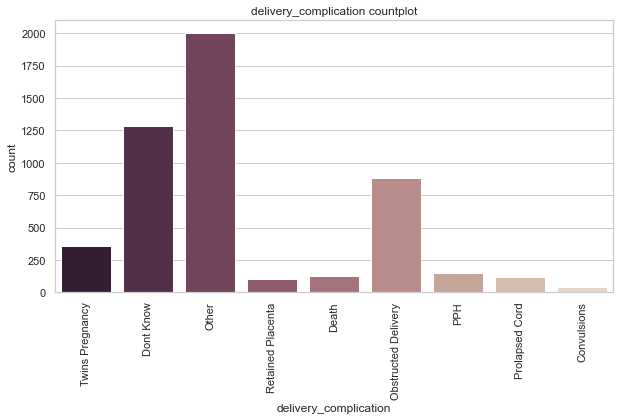

In [51]:
categorical_eda(df, 'delivery_complication', (10, 5))

### delivery_conducted_by

Unique values: ['Doctor' 'Relative' 'Staff Nurse' 'SBA' 'NON SBA' 'LHV' 'ANM' 'Other']
No. of unique values: 8
Missing values count: 0 / 332462
Missing values %: 0.0
Value counts: 
Doctor         60.307644
Staff Nurse    36.245947
NON SBA         1.776744
Relative        0.524571
ANM             0.522466
SBA             0.457797
Other           0.093545
LHV             0.071286
Name: delivery_conducted_by, dtype: float64


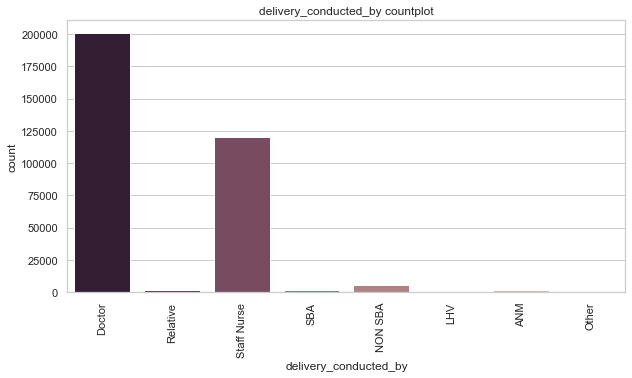

In [53]:
categorical_eda(df, 'delivery_conducted_by', (10, 5))

### delivery_date

Unique values: ['2018-11-20T00:00:00.000000000' '2018-06-26T00:00:00.000000000'
 '2018-12-03T00:00:00.000000000' ... '2020-05-27T00:00:00.000000000'
 '2020-05-28T00:00:00.000000000' '2020-05-29T00:00:00.000000000']
No. of unique values: 1155
Missing values count: 0 / 332462
Missing values %: 0.0
Value counts: 
2018-11-25    0.208746
2020-01-01    0.190097
2019-10-10    0.176261
2019-10-18    0.175960
2020-01-03    0.175358
                ...   
2020-05-24    0.012031
2020-05-26    0.009625
2020-05-27    0.006317
2020-05-28    0.006016
2020-05-29    0.003309
Name: delivery_date, Length: 1155, dtype: float64
Description: 
count       38.000000
mean      8749.000000
std       3578.756465
min       2379.000000
25%       6058.250000
50%       8455.500000
75%      11169.500000
max      15356.000000
Name: id, dtype: float64


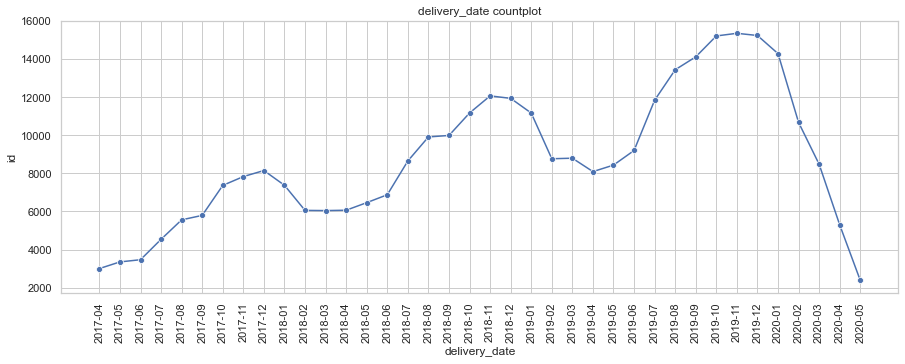

In [69]:
timeseries_eda(df, 'delivery_date', (15, 5))

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332462 entries, 0 to 332461
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           332462 non-null  object        
 1   state                        332462 non-null  object        
 2   district                     332236 non-null  object        
 3   case_no                      332462 non-null  float64       
 4   death_cause                  124 non-null     object        
 5   death_other                  67 non-null      object        
 6   delivery_comp1               258864 non-null  object        
 7   delivery_comp2               258864 non-null  object        
 8   delivery_comp3               258864 non-null  object        
 9   delivery_comp4               258864 non-null  object        
 10  delivery_comp5               0 non-null       float64       
 11  delivery_complication     

### delivery_outcomes

Unique values: ['Live Birth' 'Still Birth' 'Abortion' nan]
No. of unique values: 3
Missing values count: 797 / 332462
Missing values %: 0.0023972664545120945
Value counts: 
Live Birth     98.349238
Still Birth     1.362519
Abortion        0.288243
Name: delivery_outcomes, dtype: float64


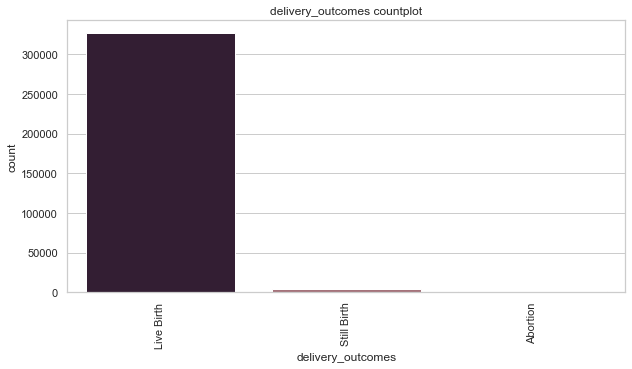

In [71]:
categorical_eda(df, 'delivery_outcomes', (10, 5))